In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import os
import matplotlib.pyplot as plt
import itertools
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
np.random.seed(2)

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
train_identity = X_train.index
test_identity = X_test.index

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 16s 1ms/step - loss: 0.0254 - accuracy: 0.9957
Epoch 2/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 3/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 5/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0030 - accuracy: 0.9995


In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 2s 712us/step - loss: 0.0033 - accuracy: 0.9994
[0.0032641207799315453, 0.9994031190872192]


In [ ]:
y_pred = model.predict(X_test) 
y_pred

array([[1.6200542e-04],
       [2.5901198e-04],
       [3.3584237e-04],
       ...,
       [1.0839038e-04],
       [9.1665479e-06],
       [4.9053931e-05]], dtype=float32)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85277    19]
 [   32   115]]


Confusion matrix, without normalization


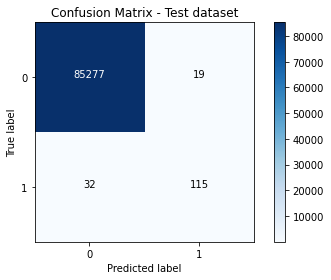

In [ ]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [ ]:
print("accuracy = ", accuracy_score(y_test, y_pred.round()))
print("precision = ", precision_score(y_test, y_pred.round()))
print("recall = ", recall_score(y_test, y_pred.round()))
print("f1_score = " ,f1_score(y_test, y_pred.round()))

accuracy =  0.999403110845827
precision =  0.8582089552238806
recall =  0.782312925170068
f1_score =  0.8185053380782918


**Undersampling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from collections import Counter

In [ ]:
fraud_ind = np.array(data[data.Class == 1].index)
num_frauds = len(fraud_ind)
print(num_frauds)
normal_ind = np.array(data[data.Class == 0].index)
num_normal = len(normal_ind)
print(num_normal)

492
284315


In [ ]:
normal_ind = data[data.Class == 0].index
random_normal_ind = np.random.choice(normal_ind, num_frauds, replace = False)
random_normal_ind = np.array(random_normal_ind)

In [ ]:
under_sample_ind = np.concatenate( [fraud_ind, random_normal_ind])

In [ ]:
print(len(under_sample_ind))

984


In [ ]:
under_sample_data = data.iloc[under_sample_ind, :]

In [ ]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [ ]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [ ]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 1s 1ms/step - loss: 0.4540 - accuracy: 0.8981
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.9248
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9398
Epoch 4/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9184
Epoch 5/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9364


In [ ]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


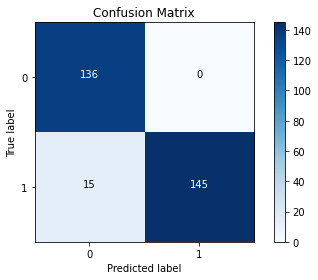

In [ ]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [ ]:
print("accuracy = ", accuracy_score(y_test, y_pred.round()))
print("precision = ", precision_score(y_test, y_pred.round()))
print("recall = ", recall_score(y_test, y_pred.round()))
print("f1_score = " ,f1_score(y_test, y_pred.round()))

accuracy =  0.9493243243243243
precision =  1.0
recall =  0.90625
f1_score =  0.9508196721311475


## **SMOTE**

In [ ]:
X_resample, y_resample = SMOTE().fit_sample(X, y)

In [ ]:
X_resample.shape

(568630, 29)

In [ ]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0532 - accuracy: 0.9797
Epoch 2/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0155 - accuracy: 0.9955
Epoch 3/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0124 - accuracy: 0.9967
Epoch 4/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0108 - accuracy: 0.9973
Epoch 5/5
26537/26537 [==============================] - 30s 1ms/step - loss: 0.0092 - accuracy: 0.9978


In [ ]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


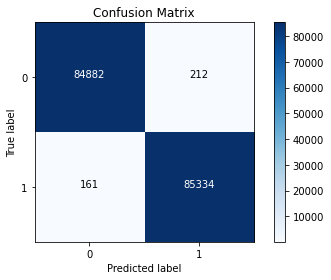

In [ ]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [ ]:
print("accuracy = ", accuracy_score(y_test, y_pred.round()))
print("precision = ", precision_score(y_test, y_pred.round()))
print("recall = ", recall_score(y_test, y_pred.round()))
print("f1_score = " ,f1_score(y_test, y_pred.round()))

accuracy =  0.9978134580776017
precision =  0.9975218011362308
recall =  0.9981168489385344
f1_score =  0.9978192363234546
